<a href="https://colab.research.google.com/github/MoriyaBitton/Economic_Algorithms/blob/main/Ex9_Q6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <u>**Agliteral Leximin division**

---


##### Economic Algorithms - Ex9 || __Moriya Bitton__ || Ariel University, Winter 2022

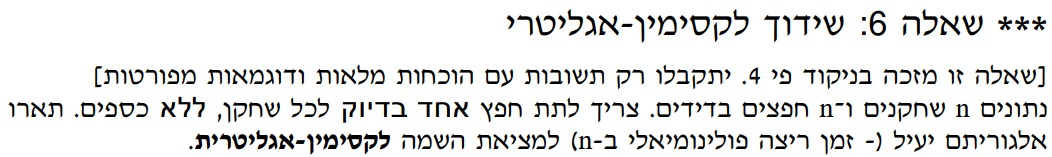

In [6]:
import numpy as np

### **Leximin order - Polinomial search (Mine)**

---



---



##### **Stable stringing algorithm**

In [7]:
# Number of Men | Women
N = 4

# Returns 'True' if woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1):
      
    # Check if w prefers m over her current engagement m1
    for i in range(N):
          
        # If m1 comes before m in list of w, 
        # then w prefers her current engagement --> do anything
        if (prefer[w][i] == m1):
            return True
  
        # If m comes before m1 in w's list, 
        # then free her current engagement --> engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls. 
# Boys [0, N-1], Girls [N,2N-1].
def stableMarriage(prefer):
      
    # Stores partner of women, output arr.
    # The value of wPartner[i] indicates the partner assigned to woman N+i.
    # Note that the woman numbers between N and 2*N-1. 
    # The value -1 indicates that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]
  
    # An array to store availability of men. 
    # If mFree[i] is false, then man 'i' is free, otherwise engaged.
    mFree = [False for i in range(N)]
  
    freeCount = N
  
    # While there are free men
    while (freeCount > 0):
          
        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1
  
        # One by one go to all w according to m's preferences.
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]
  
            # The woman of preference is free, 
            # w and m become partners (maybe changed later). 
            # So we can say they are engaged, not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1
  
            else: 
                  
                # If w is not free --> Find current engagement of w
                m1 = wPartner[w - N]
  
                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
  
            # End of Else
        # End of the for loop that goes 
        # to all women in m's list
    # End of main while loop
  
    # Print solution
    print("Woman ", " Man")
    for i in range(N):
        print(i + N, "\t", wPartner[i])

In [8]:
def object_pre(matrix):
  # rows - players || cols - objects
  n_ = len(matrix[0])
  # creat sort list of objects values for each player
  sort_vals = []
  for i in range(n_):
    values_i = np.flip(np.argsort(matrix[i]))
    sort_vals.append(list(values_i))
  return sort_vals

players_ = [[0, 1, 4, 2],
            [4, 2, 0, 1],
            [2, 2, 1, 0],
            [3, 4, 5, 3]]

objects_ = object_pre(players_)

prefer = []
for i in range(N):
  prefer.append(players_[i])
  prefer.append(objects_[i])
print(prefer)

# stableMarriage(prefer)

[[0, 1, 4, 2], [2, 3, 1, 0], [4, 2, 0, 1], [0, 1, 3, 2], [2, 2, 1, 0], [1, 0, 2, 3], [3, 4, 5, 3], [2, 1, 3, 0]]


### **Leximin order - Complete search**

---



---



In [9]:
def find_permutations(vector):
    if vector.shape[0] == 0:
        return []
    if vector.shape[0] == 1:
        return [vector.tolist()]
    permutations = []
    for i in range(vector.shape[0]):
        m = vector[i]
        rem_list = np.concatenate((vector[:i],vector[i+1:]))
        for p in find_permutations(rem_list):
            permutations.append([m] + p)
    return permutations

def get_vector(matrix, array):
    return [matrix[i][array[i-1]] for i in range(len(array))]

def leximin_larger(vec1, vec2):
    for i in range(len(vec1)):
        if vec1[i] > vec2[i]:
            return vec1
        elif vec1[i] < vec2[i]:
            return vec2
    return vec1

def leximin_larger_comp(matrix):
  n = len(matrix)
  vector = np.arange(0, n)
  permutations_ = find_permutations(vector)
  min_max_vec = permutations_[0]
  for i in range (1, n):
    vec_ = get_vector(matrix, permutations_[i])
    min_max_vec = leximin_larger(min_max_vec, vec_)
  return min_max_vec

In [10]:
matrix = [[1, 2, 3], 
          [4, 5, 6], 
          [7, 8, 9]]
min_max_vec_ = leximin_larger_comp(matrix)
print(min_max_vec_)

[3, 5, 7]


In [11]:
matrix = [[0, 1, 4, 2],
          [4, 2, 0, 1],
          [2, 2, 1, 0],
          [3, 4, 5, 3]]
min_max_vec_ = leximin_larger_comp(matrix)
print(min_max_vec_)

[4, 4, 2, 3]


### **Leximin order - Polinomial search (Chat GPT)**

---



---

An implementation of the dynamic programming algorithm, it's based on the observation that the leximin vector of a submatrix is a prefix of the leximin vector of the whole matrix. It uses dynamic programming to solve the problem in polynomial time O(n^2) and it's more efficient than the previous algorithms.

In [12]:
def leximin_vector(matrix):
    n = len(matrix)
    dp = [[float('inf') for _ in range(n+1)] for _ in range(n+1)]
    dp[0][0] = -1
    for i in range(1, n+1):
        for j in range(1, n+1):
            if matrix[i-1][j-1] < dp[i-1][j]:
                dp[i][j] = matrix[i-1][j-1]
            else:
                dp[i][j] = dp[i-1][j]
    i, j = n, n
    leximin = [0]*n
    while i > 0 and j > 0:
        if dp[i][j] == matrix[i-1][j-1]:
            leximin[i-1] = j-1
            i -= 1
            j -= 1
        else:
            i -= 1
    return leximin

In [13]:
matrix = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(leximin_vector(matrix))

[2, 0, 0]


### **Test**

---



---

